In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=44cf3df5a2ab1bb69aaa5a1753d0f77b0dfbf53585523f716546e3384c228e52
  Stored in directory: /home/ec2-user/.cache/pip/wheels/68/72/87/a384b8b8139f2489024464d6f5937e6acb2054c57d25519fb9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=857e53d7a360e97b13049f196feded2e5bc5e703559ddbb64736cb93c2f49d41
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [822]:
import yfinance as yf
import pandas as pd
from datetime import date

In [823]:
#Load 2020 IPO File
#add a column to flag invalid entries
orig = pd.read_csv("2020IPO.csv", names=["IPO_Date","Ticker","IPO_Price"])
orig['Skip']='No'

#Load list of invalid entries
skips= pd.read_csv("remove.csv", names=["Ticker"])




In [824]:
#function flag which tickers should be skipped
#dfmaster = the full list of tickers
#dfskip = the ones to be flagged
#returns dfmaster with the dfskip items flagged
def flag(dfmaster,dfskip):
    r=dfskip['Ticker'].tolist() 
    for index, row in dfmaster.iterrows():
        if(row['Ticker'] in r):
            dfmaster.iloc[index,dfmaster.columns.get_loc('Skip')]='Yes'
    return dfmaster


In [825]:
def getIPODate(ticker):
    return orig.loc[orig['Ticker']==ticker]['IPO_Date'].values[0]

def getd1Open(df):
    return df.loc[df.index.min()].Open

def getAllTimeHigh(df):
    return [df.High.max(),df.idxmax().High]

def getAllTimeLow(df):
    return [df.Low.min(),df.idxmin().Low]

def getDaysATH(df):
    return (df.idxmax().High-df.index.min()).days

def getDaysATL(df):
    return (df.idxmin().Low-df.index.min()).days

def getLowBeforeATH(df):
    temp=df[df.index.min():df.idxmax().High]
    return [temp.Low.min(), temp.idxmin().Low]

def getIPOPrice(ticker):
    return orig.loc[orig['Ticker']==ticker]['IPO_Price'].values[0]

   


In [826]:
datetime.strptime(getIPODate('VEL'), '%d-%b-%y')


datetime.datetime(2020, 1, 17, 0, 0)

In [827]:
#function fill - adds all relevant data to the master dataframe

def fill(df):
    stocks=df['Ticker'].loc[df['Skip']=='No'].tolist()
    infodf=pd.DataFrame({"Ticker":[],"Industry":[],"IPO_date":[],"IPO_Price":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[], "Days_to_ATH":[], "Days_to_ATL":[], "Low_Before_ATH":[]})

    for stock in stocks:
        print("running " + stock)
        try:
            info = yf.download(stock, start=datetime.strptime(getIPODate(stock),'%d-%b-%y'), end=date.today())
        except:
            print("Issue getting historical data for: " + stock)
        try:
            info2= yf.Ticker(stock)
            industry=info2.info['industry']
        except:
            print("Issue with Industry - setting to N/A")
            industry="n/a"
        
        try:
            temp=pd.DataFrame({"Ticker":[],"Industry":[],"IPO_date":[], "IPO_Price":[], "d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[], "Days_to_ATH":[], "Days_to_ATL":[], "Low_Before_ATH":[]})
            temp.loc[stock]=[stock]+[industry]+[getIPODate(stock)]+[getIPOPrice(stock)]+[getd1Open(info)]+[getAllTimeHigh(info)[0]]+[getAllTimeHigh(info)[1]]+[getAllTimeLow(info)[0]]+[getAllTimeLow(info)[1]]+[getDaysATH(info)]+[getDaysATL(info)]+[getLowBeforeATH(info)[0]]
            infodf=infodf.append(temp)
        except:
            print("Different issue " + stock + " not added")
        
    return infodf


In [828]:
df=flag(orig,skips)
df=fill(df)

running VEL
[*********************100%***********************]  1 of 1 completed
running IMAB
[*********************100%***********************]  1 of 1 completed
running DNK
[*********************100%***********************]  1 of 1 completed
running LIZI
[*********************100%***********************]  1 of 1 completed
running SCVX
[*********************100%***********************]  1 of 1 completed
running GHIV
[*********************100%***********************]  1 of 1 completed
running ANVS
[*********************100%***********************]  1 of 1 completed
running BDTX
[*********************100%***********************]  1 of 1 completed
running ANPC
[*********************100%***********************]  1 of 1 completed
running REYN
[*********************100%***********************]  1 of 1 completed
running ONEM
[*********************100%***********************]  1 of 1 completed
running ARQT
[*********************100%***********************]  1 of 1 completed
running CSPR
[****

In [840]:
df.to_csv('SA-repo/ipo.csv', index = False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'SA-repo/ipo.csv'

In [719]:
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

In [738]:
import time
from datetime import datetime, timedelta
df.Days_to_ATH.dt.days

VEL      34
IMAB    357
DNK      20
LIZI      0
SCVX    125
       ... 
MASS     10
GBS       0
IKT       0
HCAR      7
MRM       0
Name: Days_to_ATH, Length: 435, dtype: int64

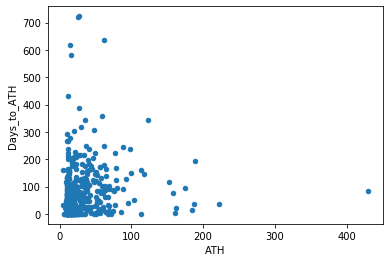

In [752]:
df.plot.scatter(x='ATH', y='Days_to_ATH')

SyntaxError: invalid syntax (<ipython-input-679-55a3bc235645>, line 1)

In [694]:
df[df['Ticker']=='ABNB']

,Ticker,Industry,IPO_date,d1Open,ATH,ATH_Date,ATL,ATL_Date,Days_to_ATH,Days_to_ATL,Low_Before_ATH,IPO_Price
ABNB,ABNB,Internet Content & Information,2020-12-10,146.0,187.419998,2021-01-14,121.5,2020-12-15,35 days,5 days,121.5,$68.00


In [479]:
df

,IPO_Date,Ticker,IPO_Price,Eliminate
0,17-Jan-20,VEL,$13.00,N/A
1,17-Jan-20,IMAB,$14.00,N/A
2,17-Jan-20,DNK,$13.50,N/A
3,17-Jan-20,LIZI,$11.00,N/A
4,24-Jan-20,SCVX,$10.00,N/A
...,...,...,...,...
475,23-Dec-20,VHAQ,$10.00,Yes
476,23-Dec-20,CFIV,$10.00,Yes
477,23-Dec-20,VII,$10.00,Yes
478,24-Dec-20,VTAQ,$10.00,Yes


In [378]:
data = yf.download('KO AAPL', period='6mo')
vel=yf.download('vel',period='1y')

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


In [269]:
sklz=yf.download('sklz', period='1y')

[*********************100%***********************]  1 of 1 completed


In [91]:
Coke = yf.download('KO', period='1y')

[*********************100%***********************]  1 of 1 completed


In [9]:
Coke.loc['2020-6-1':'2020-6-10']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,46.660000,47.230000,46.590000,46.990002,45.833645,17010700
2020-06-02,47.160000,47.279999,46.560001,46.900002,45.745865,15255100
2020-06-03,47.270000,48.119999,47.119999,47.900002,46.721252,15508300
2020-06-04,47.939999,48.270000,47.380001,47.919998,46.740753,13604700
2020-06-05,48.540001,49.490002,48.459999,49.090000,47.881969,20504800
2020-06-08,49.540001,49.970001,49.470001,49.849998,48.623264,19896700
2020-06-09,49.590000,49.590000,48.680000,49.000000,47.794182,16713700
2020-06-10,49.160000,49.270000,48.570000,48.619999,47.423534,15716600


In [10]:
Coke.loc[Coke.index.max()]

Open         5.302000e+01
High         5.355000e+01
Low          5.302000e+01
Close        5.344000e+01
Adj Close    5.344000e+01
Volume       3.265500e+06
Name: 2020-12-24 00:00:00, dtype: float64

In [610]:
Coke.loc[Coke['High'] > 49]['2020-6-1':'2020-6-10']

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2020-06-05,48.540001,49.490002,48.459999,49.090000,47.881969,20504800,COKE
2020-06-08,49.540001,49.970001,49.470001,49.849998,48.623264,19896700,COKE
2020-06-09,49.590000,49.590000,48.680000,49.000000,47.794182,16713700,COKE
2020-06-10,49.160000,49.270000,48.570000,48.619999,47.423534,15716600,COKE


In [32]:
sklz.loc[sklz.index.max()]

Open         2.500000e+01
High         2.561000e+01
Low          2.377000e+01
Close        2.450000e+01
Adj Close    2.450000e+01
Volume       6.560800e+06
Name: 2021-01-12 00:00:00, dtype: float64

In [341]:
SKLZ.info['industry']

'Electronic Gaming & Multimedia'

In [342]:
stocks=df['Ticker'].tolist()
stocks

['VEL',
 'IMAB',
 'DNK',
 'LIZI',
 'SCVX',
 'GHIV',
 'ANVS',
 'BDTX',
 'ANPC',
 'REYN',
 'ONEM',
 'ARQT',
 'CSPR',
 'SDGR',
 'BEAM',
 'PPD',
 'ONEW',
 'NREF',
 'PFHD',
 'CCAC',
 'GNRS',
 'HUIZ',
 'RVMD',
 'GRIL',
 'MEDS',
 'ZGYH',
 'NBAC',
 'CCXX',
 'ESSC',
 'DMYT',
 'ZCMD',
 'PASG',
 'GFL',
 'LSAC',
 'FEAC',
 'DFPH',
 'IMRA',
 'WIMI',
 'ZNTL',
 'KROS',
 'IPOC',
 'ORIC',
 'PCPL',
 'CHAQ',
 'IPOB',
 'FVAC',
 'LYRA',
 'CGRO',
 'GAN',
 'ROCH',
 'SOAC',
 'LOAK',
 'KC',
 'AYLA',
 'CLEU',
 'JWS',
 'GIK',
 'ADCT',
 'NOVS',
 'BMRG',
 'SLQT',
 'LGVW',
 'NARI',
 'WPF',
 'PLRX',
 'WMG',
 'ZI',
 'AMTI',
 'CALT',
 'DADA',
 'FOUR',
 'LEGN',
 'ARYB',
 'MCAC',
 'VRM',
 'HEC',
 'UCL',
 'LTRN',
 'AZEK',
 'BNR',
 'GBIO',
 'PCVX',
 'RNA',
 'RPRX',
 'TREB',
 'FMTX',
 'GTH',
 'PROG',
 'RPTX',
 'NUZE',
 'BRLI',
 'AKUS',
 'EBON',
 'FUSN',
 'PYPD',
 'API',
 'ACI',
 'FUSE',
 'KCAC',
 'ADTX',
 'GSAH',
 'DNB',
 'PANA',
 'LMND',
 'ACCD',
 'CPSR',
 'TXAC',
 'BLCT',
 'RACA',
 'NKTX',
 'PSTX',
 'QH',
 'IVA',
 'PTK',


In [260]:
stuff=yf.Tickers(list[:10])

In [344]:
newdf=pd.DataFrame({"Ticker":[],"Open":[],"High":[],"Low":[],"Close":[],"Adj Close":[],"Volume":[]})
sumdf=pd.DataFrame({"Ticker":[],"IPO_date":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[]})
testdf=pd.DataFrame({"Ticker":[],"IPO_date":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[]})


In [105]:
sklz['Ticker']="SKLZ"

In [199]:
newdf[(newdf['Ticker'] == 'SKLZ') & (newdf['Open']==newdf['Open'].min())]

,Ticker,Open,High,Low,Close,Adj Close,Volume
2020-05-08,SKLZ,9.85,10.0,9.85,10.0,10.0,349600.0


In [353]:
infodf=pd.DataFrame({"Ticker":[],"IPO_date":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[], "Days_to_ATH":[], "Days_to_ATL":[]})


In [415]:
infodf=pd.DataFrame({"Ticker":[],"IPO_date":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[]})

for stock in stocks:
    if 
    info = yf.download(stock, period='5y')
    #temp=pd.DataFrame({"Ticker":[],"IPO_date":[],"d1Open":[],"ATH":[],"ATH_Date":[],"ATL":[],"ATL_Date":[], "Days_to_ATH":[], "Days_to_ATL":[]})
    #temp.loc[stock]=[stock]+[info.index.min()]+[info.loc[info.index.min()].Open]+[info.High.max()]+[info.idxmax().High]+[info.Low.min()]+[info.idxmin().Low]+[info.idxmax().High-info.index.min()]+[info.idxmin().Low-info.index.min()]
    #infodf=infodf.append(temp)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [413]:
Low_Before_ATH(vel)

[13.170000076293945, Timestamp('2020-01-24 00:00:00')]

In [365]:
infodf.head(50)

,Ticker,IPO_date,d1Open,ATH,ATH_Date,ATL,ATL_Date,Days_to_ATH,Days_to_ATL
VEL,VEL,2020-01-17,13.850000,14.900000,2020-02-20,2.240000,2020-04-03,34 days,77 days
IMAB,IMAB,2020-01-17,14.750000,59.139999,2021-01-08,9.300000,2020-02-04,357 days,18 days
DNK,DNK,2020-01-17,13.500000,13.900000,2020-02-06,1.270000,2020-11-04,20 days,292 days
LIZI,LIZI,2020-01-17,11.030000,15.250000,2020-01-17,1.950000,2020-10-30,0 days,287 days
SCVX,SCVX,2020-03-20,9.400000,12.370000,2020-07-23,9.200000,2020-03-20,125 days,0 days
GHIV,GHIV,2020-03-25,9.300000,14.380000,2020-12-28,9.300000,2020-03-25,278 days,0 days
ANVS,ANVS,2020-01-29,6.630000,10.610000,2020-01-29,2.420000,2020-03-23,0 days,54 days
BDTX,BDTX,2020-01-31,37.040001,46.250000,2020-06-03,17.629999,2020-03-18,124 days,47 days
ANPC,ANPC,2020-01-31,10.990000,12.000000,2020-02-27,3.150000,2020-10-05,27 days,248 days
REYN,REYN,2020-01-31,27.500000,36.000000,2020-06-05,21.610001,2020-03-16,126 days,45 days


In [361]:
print(sklz.High.max())
print(sklz.idxmax().High-sklz.idxmin().Low)


27.489999771118164
260 days 00:00:00


Open         2.630000e+01
High         2.749000e+01
Low          2.567000e+01
Close        2.631000e+01
Adj Close    2.631000e+01
Volume       6.582800e+06
Name: 2021-01-13 00:00:00, dtype: float64


In [346]:
testdf.loc['SKLZ']=["SKLZ"]+[sklz.index.min()]+[sklz.loc[sklz.index.min()].Open]+[sklz.High.max()]+[sklz.idxmax().High]+[sklz.Low.min()]+[sklz.idxmin().Low]

In [347]:
testdf

,Ticker,IPO_date,d1Open,ATH,ATH_Date,ATL,ATL_Date
SKLZ,SKLZ,2020-04-27,9.95,27.49,2021-01-13,9.81,2020-04-28


In [281]:
newdf[((newdf['Ticker'] == 'IPOC')newdf['Open'].min()]

SyntaxError: invalid syntax (<ipython-input-281-f920796cfbf0>, line 1)

In [259]:
newdf

,Ticker,Open,High,Low,Close,Adj Close,Volume


In [262]:
print(stuff)

yfinance.Tickers object <VEL,IMAB,DNK,LIZI,SCVX,GHIV,ANVS,BDTX,ANPC,REYN>
